# __Visualización para análisis exporatorio__
# AE09. Seaborn Stripplot y Swarmplot

En este notebook veremos dos tipos de gráficas de `Seaborn` las cuales son excelentes alternativas para hacer gráficas categóricas utilizando puntos.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Importamos las librerías adicionales para el manejo numérico y de DataFrame
import numpy as np
import pandas as pd

In [ ]:
sns.set(context='notebook',style='darkgrid',palette='dark')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
penguins_df = pd.read_csv("/content/drive/MyDrive/Data_Science/AnálisisExploratorioYEstadística/Rodrigo/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## <font color='blue'>__Gráficas stripplot__</font>

El método `sns.stripplot` sitúa la variable categórica en el eje `x` y la variable cuantitativa en el eje `y`, mostrando con un punto cada uno de los valores. Para poder distinguir los puntos en el caso de que estén muy próximos, por defecto, se aplica un "temblor" (jitter) a los puntos para separarlos del eje vertical de forma aleatoria:

[Documentación stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot)


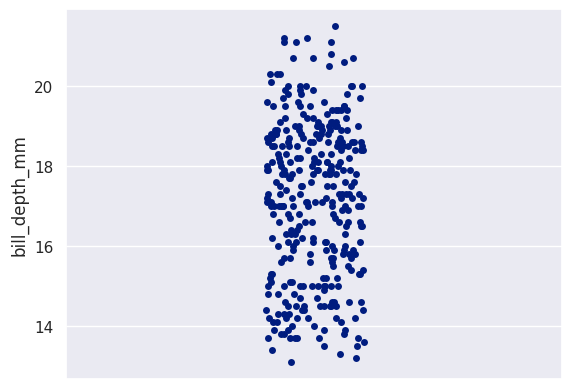

In [ ]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df)
plt.show()

ejemplo de un cambio en el parámetro `jitter`:

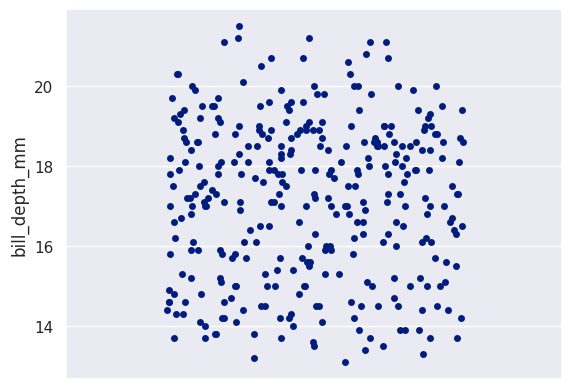

In [ ]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df, jitter=0.3)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría.

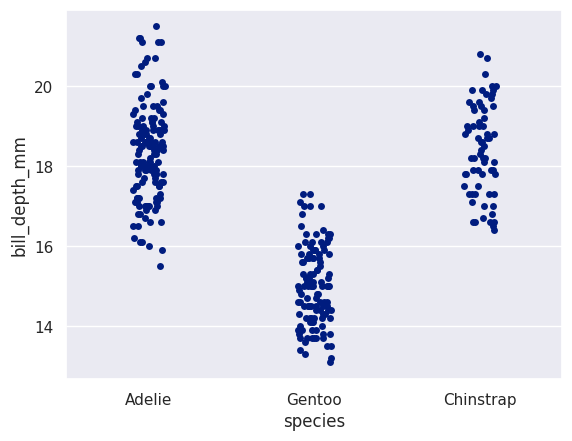

In [ ]:
sns.stripplot(x='species', y ='bill_depth_mm', data=penguins_df)
plt.show()

## <font color='blue'>__Gráficas swarmplot__</font>

El segundo método corresponde a `swarmplot` (gráfico de enjambre). Para poder realizar este gráfico hay que utilizar el método `sns.swarmplot`, el cual genera gráficos semejantes a los generados por `sns.stripplot`, pero aplicando a la posición de los puntos cierto algoritmo de forma que no solapen. Esto ofrece una mejor visualización a costa de dejar de ser útil para conjuntos de datos muy grandes:

[Documentación Swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)


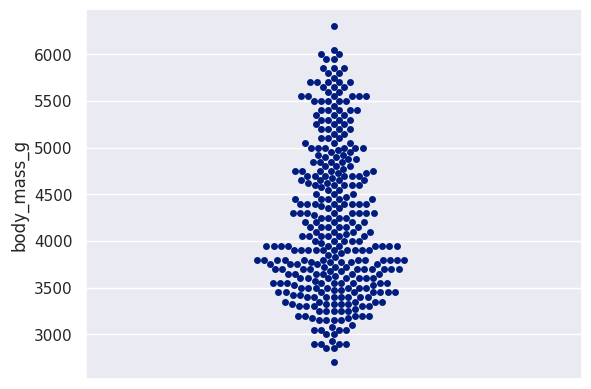

In [ ]:
sns.swarmplot(y ='body_mass_g', data=penguins_df)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría. (de la misma forma que el stripplot)

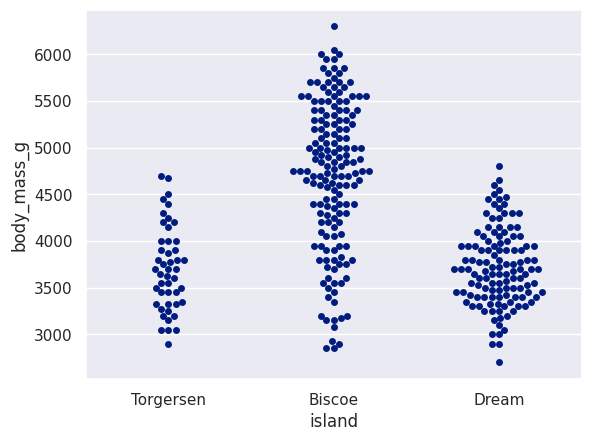

In [ ]:
sns.swarmplot(x='island', y ='body_mass_g', data=penguins_df)
plt.show()

Y recordar que también podemos pintar los puntos, dependiendo de alguna columna de nuestro interés

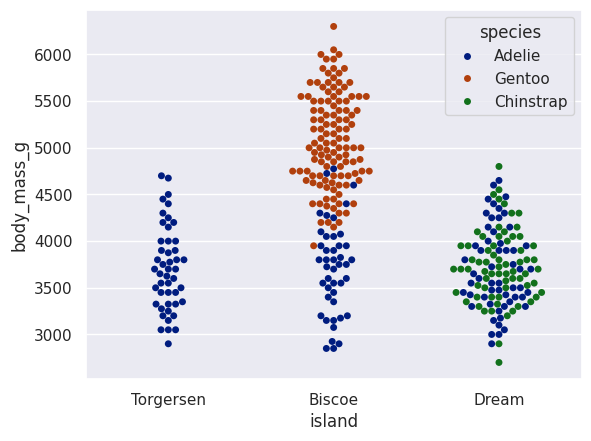

In [ ]:
sns.swarmplot(x='island', y ='body_mass_g', data=penguins_df, hue="species")
plt.show()

Se puede dibujar un diagrama de enjambre por sí solo, pero también es un buen complemento para un diagrama de caja o violín en los casos en los que desee mostrar todas las observaciones junto con alguna representación de la distribución subyacente.

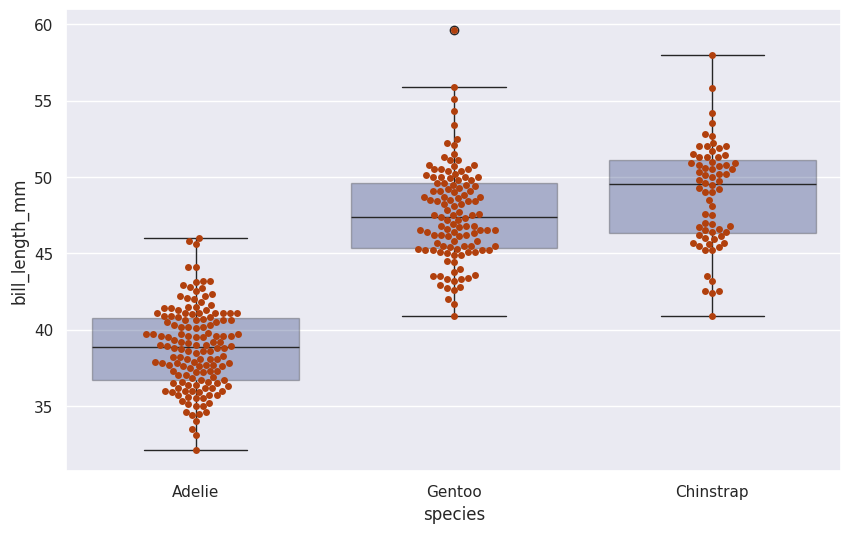

In [ ]:
# Para una mejor visualización le damos transparencia al boxplot, sin embargo, este método
# no tiene definido el parámetro 'alpha' en la API, pero si se puede lograr este efecto a
# través de kwargs que se transmiten a matplotlib
# Acá boxprop es un argumento de matplotlib
plt.figure(figsize=(10,6))
ax = sns.boxplot(x='species', y='bill_length_mm', data=penguins_df, boxprops=dict(alpha=0.3))
ax = sns.swarmplot(x='species', y='bill_length_mm', data=penguins_df)
plt.show()

## <font color='blue'>__Ejercicios__</font>

### <font color='green'>__Actividad 1:__</font>

Para esta dinámica utilizaremos un set de datos de precios de diamantes (VD09.csv). La mayoría de las variables son auto explicativas a excepción de las variables `x`, `y`, `z`. Básicamente, estas variables hacen referencia al largo alto y ancho del diamante respectivamente. La idea es implementar la mayoría de los gráficos que hemos visto, con un par de diferencias:

1. Graficar la matriz de correlación para las distintas variables numéricas
2. Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z
3. Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
    - Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método `diamonds_df.sample(100)`
    - Guarde esta muestra en una variable, utilícela para generar los gráficos
    - Genere los boxplots con una paleta de color pastel (puede que el parámetro `palette` puede ser de ayuda)
    - Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?**
    - Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo?**
4. Utilizando subplots, genere 4 barplots
    - Cuente cuantos diamantes hay para cada corte (`cut`)
    - Cuente cuantos diamantes hay para cada color
    - Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
    - Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante **¿Que función de numpy suma todos los elementos de un arreglo?**


In [ ]:
diamonds_df = pd.read_csv("/content/drive/MyDrive/Data_Science/AnálisisExploratorioYEstadística/Rodrigo/Archivos/VD09.csv")
diamonds_df.head()
# Tu código aquí ...


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

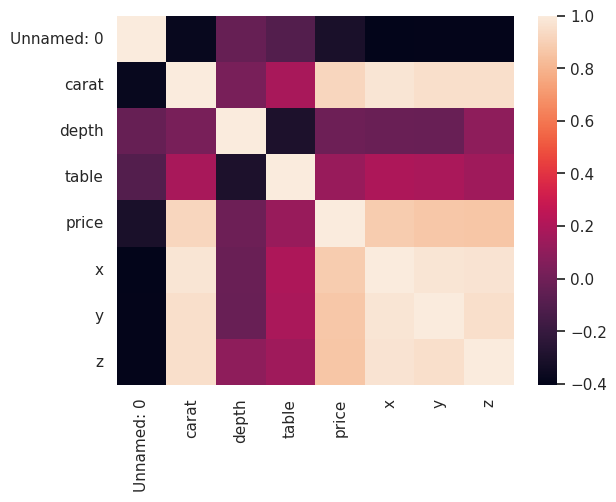

In [ ]:
# Graficar la matriz de correlación para las distintas variables numéricas
diamonds_corr = diamonds_df.corr(numeric_only=True)
sns.heatmap(data=diamonds_corr)

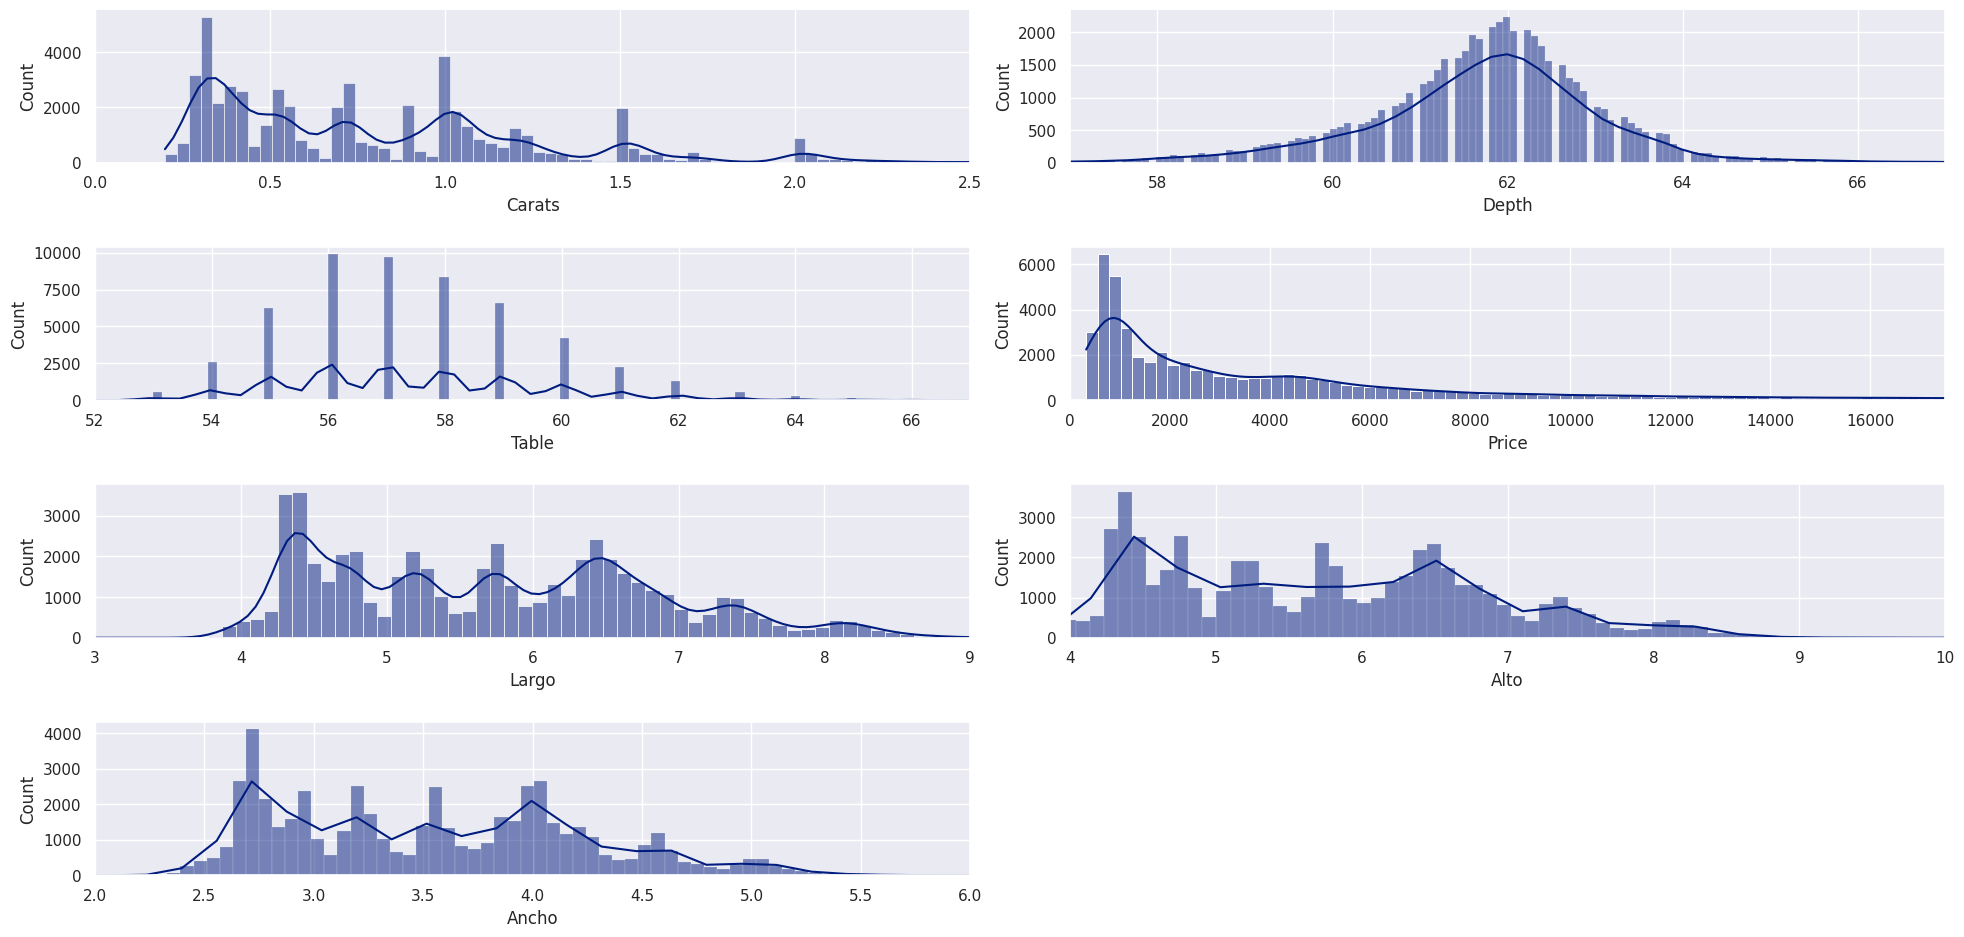

In [ ]:
# Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z
fig, ax = plt.subplots(4,2, figsize=(20, 10))
fig.tight_layout(pad=3.0) # espacio entre gráficos

sns.histplot(x='carat', data = diamonds_df, ax = ax[0,0], kde = True)
ax[0,0].set_xlabel("Carats") # etiqueta
ax[0,0].set_xlim(0,2.5) #límite x inferior y superior, para mejor visualización

sns.histplot(x='depth', data = diamonds_df, ax = ax[0,1], kde = True)
ax[0,1].set_xlabel("Depth")
ax[0,1].set_xlim(57,67)

sns.histplot(x='table', data = diamonds_df, ax = ax[1,0], kde = True)
ax[1,0].set_xlabel("Table")
ax[1,0].set_xlim(52,67)

sns.histplot(x='price', data = diamonds_df, kde=True, ax = ax[1,1])
ax[1,1].set_xlabel("Price")
ax[1,1].set_xlim(0,17500)

sns.histplot(x='x', data = diamonds_df, kde=True, ax = ax[2,0])
ax[2,0].set_xlabel("Largo")
ax[2,0].set_xlim(3,9)

sns.histplot(x='y', data = diamonds_df, kde=True, ax = ax[2,1])
ax[2,1].set_xlabel("Alto")
ax[2,1].set_xlim(4,10)

sns.histplot(x='z', data = diamonds_df, kde=True, ax = ax[3,0])
ax[3,0].set_xlabel("Ancho")
ax[3,0].set_xlim(2,6)
# plot invisible
ax[3,1].set_visible(False)
plt.show()



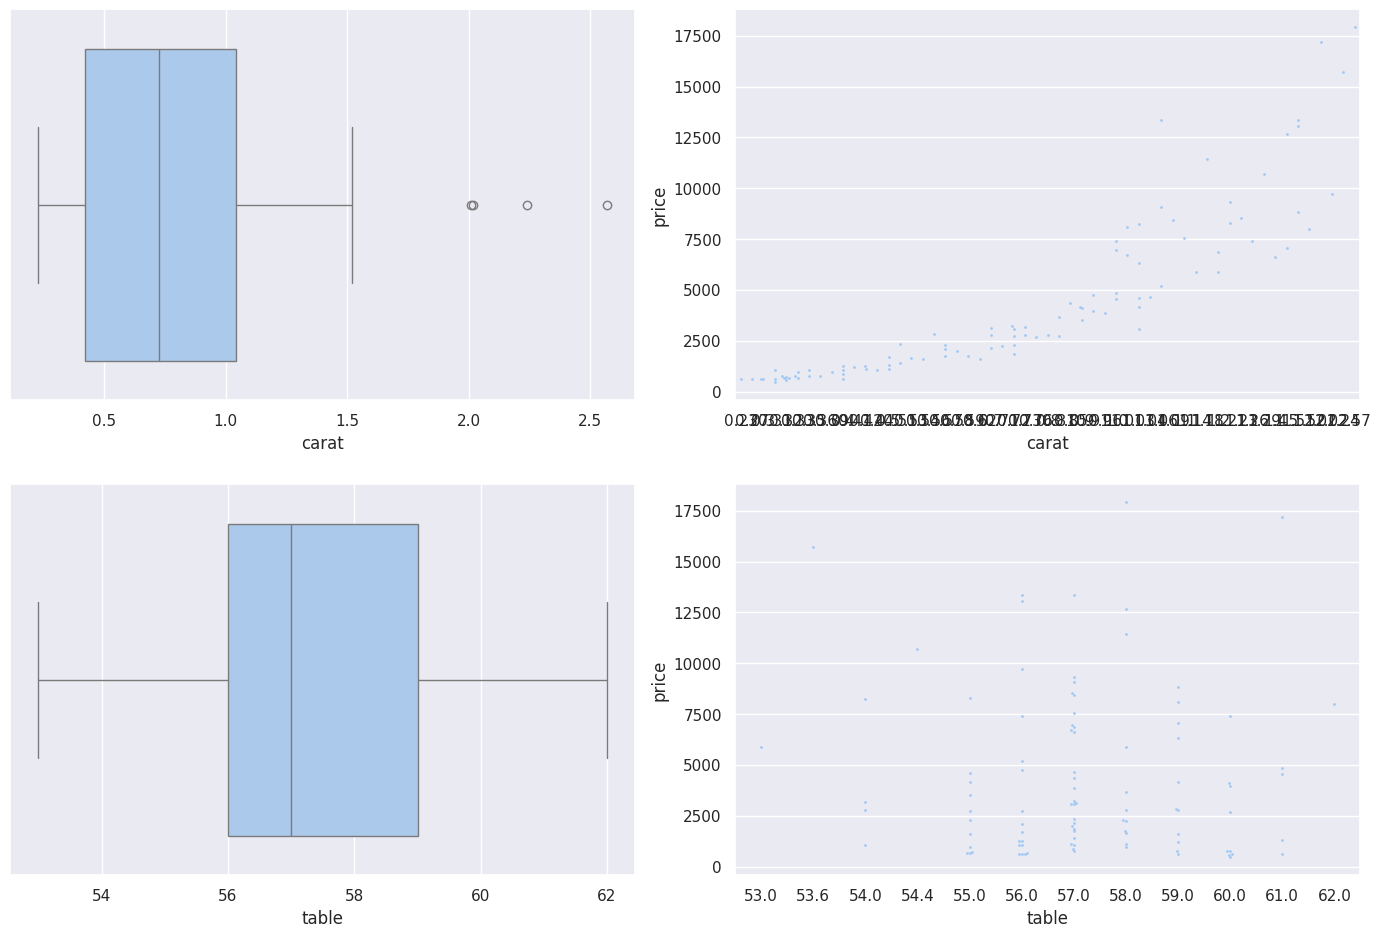

In [ ]:
# Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
fig, ax = plt.subplots(2,2, figsize=(15, 10))

# Genere los boxplots con una paleta de color pastel (puede que el parámetro palette puede ser de ayuda)
sns.set_palette("pastel")

# Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método diamonds_df.sample(100)
# Guarde esta muestra en una variable, utilícela para generar los gráficos
diamonds_sample = diamonds_df.sample(100)

# Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado)
fig.tight_layout(pad=3.0) # espacio entre gráficos
sns.boxplot(data=diamonds_sample, x="carat", ax=ax[0,0])
sns.swarmplot(data=diamonds_sample, x="carat", y="price", ax=ax[0,1], s=2)

sns.boxplot(data=diamonds_sample, x="table", ax=ax[1,0])
sns.swarmplot(data=diamonds_sample, x="table", y="price", ax=ax[1,1], s=2)

plt.show()


# ¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?

Si, obtuvimos varios de estos:


```
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
```
Esto ocurrió porque la cantidad de puntos en el gráfico no cabían y el gráfico quedaba demasiado poblado. Un workaround que funcionó fue definir el tamaño (el radio) de cada punto con el argumento s=2 para que cupieran bien y se diferenciara uno del otro, pero con esto pierde el propósito el uso de un swarmplot, pues ya no transmite la misma información. Para un swarmplot hay que tener siempre en consideración el tamaño de la muestra.

Con un tamaño mayor de muestra (como 1000), claramente el warning aparecería por doquier, con porcentajes mayores de puntos que no se pudieron graficar.



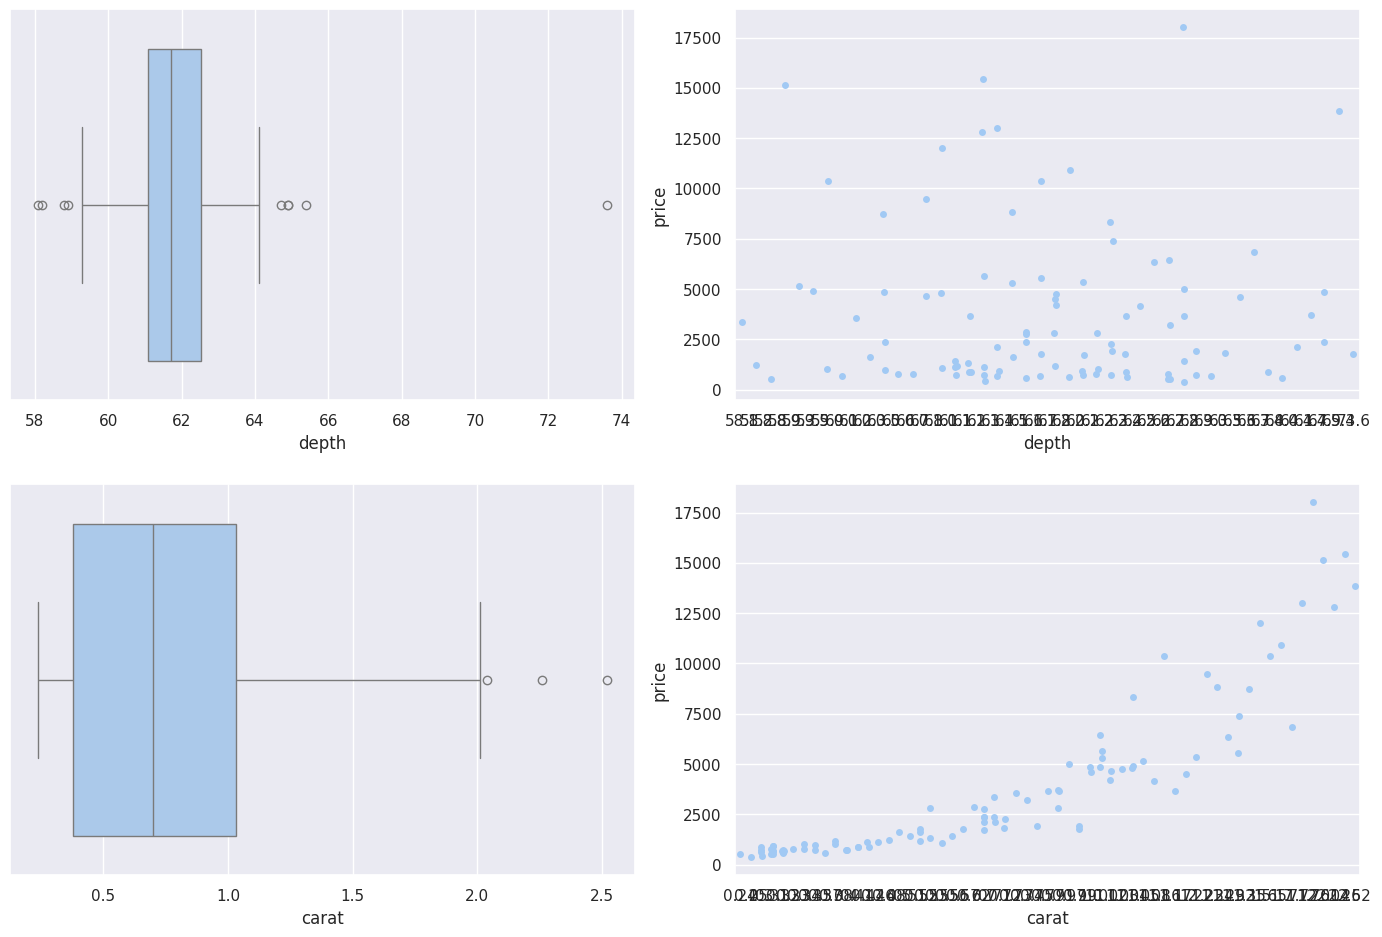

In [ ]:
# Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado)

fig, ax = plt.subplots(2,2, figsize=(15, 10))

fig.tight_layout(pad=3.0) # espacio entre gráficos
sns.boxplot(data=diamonds_sample, x="depth", ax=ax[0,0])
sns.stripplot(data=diamonds_sample, x="depth", y="price", ax=ax[0,1])
sns.boxplot(data=diamonds_sample, x="carat", ax=ax[1,0])
sns.stripplot(data=diamonds_sample, x="carat", y="price", ax=ax[1,1])

plt.show()



# ¿Surge algún warning de ejecución de codigo?

En este caso no surgieron problemas, y esto se explica porque los swarmplot NO permiten overlapping, mientras los strip plots SÍ lo permiten. Entonces cuando la muestra es demasiado grande algunos puntos no caben y seaborn los deja fuera, informando en el warning el porcentaje de ellos.

<font color='PURPLE'>__MATERIAL ADICIONAL__</font>


https://seaborn.pydata.org/generated/seaborn.swarmplot.html

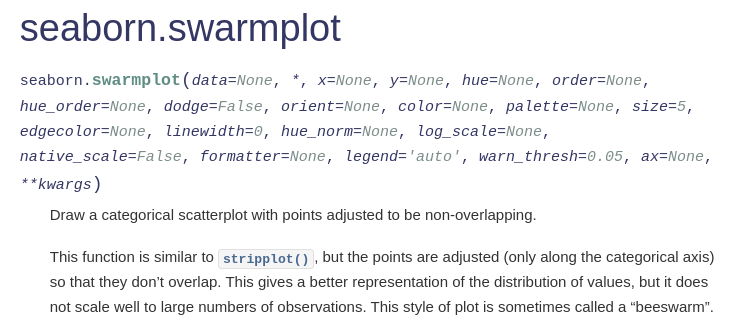
Documentación con más información de los gráficos.


https://seaborn.pydata.org/generated/seaborn.stripplot.html




<font color='PURPLE'>__FIN MATERIAL ADICIONAL__</font>



<font color='green'>Fin actividad 1</font>